In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cinema= pd.read_csv(r"C:\Users\manhphi2811\OneDrive - National Economics University\Học Kỳ 6\Midterm\df_final.csv")

In [5]:
cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33966 entries, 0 to 33965
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   orderid       33966 non-null  object
 1   cashier       33966 non-null  object
 2   saledate      33966 non-null  object
 3   total         33966 non-null  int64 
 4   customerid    33966 non-null  object
 5   ticketcode    33966 non-null  int64 
 6   date          33966 non-null  object
 7   time          33966 non-null  object
 8   slot          33966 non-null  object
 9   room          33966 non-null  int64 
 10  show_id       33966 non-null  object
 11  slot type     33966 non-null  object
 12  ticket type   33966 non-null  object
 13  ticket price  33966 non-null  int64 
 14  popcorn       33966 non-null  object
 15  DOB           33966 non-null  object
 16  Gender        33966 non-null  object
 17  Quận/Huyện    33966 non-null  object
 18  Tỉnh          33966 non-null  object
 19  job 

In [6]:
cinema.head()

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,...,job,industry,title,director,country,rating,listed_in,Age,Time of day,Age Group
0,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074925,2019-05-06,1900-01-01 18:15:00,G04,3,...,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-25)
1,10006052019B0225,emp002,2019-05-06,90000,0000000014,20074924,2019-05-06,1900-01-01 18:15:00,G03,3,...,student,computer,Marvel Studios' Avengers: Endgame,"Anthony Russo, Joe Russo",United States,PG-13,"Action-Adventure, Fantasy, Science Fiction",20,Tối,Thanh niên (18-25)
2,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097042,2019-05-22,1900-01-01 20:45:00,E04,2,...,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-25)
3,10022052019B0167,emp011,2019-05-22,90000,0000000034,20097041,2019-05-22,1900-01-01 20:45:00,E03,2,...,student,health service,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),Chad Stahelski,United States,R,Action,21,Tối,Thanh niên (18-25)
4,10130052019B0141,emp005,2019-05-30,90000,0000000034,20106761,2019-05-30,1900-01-01 19:30:00,F04,1,...,student,health service,NGÔI ĐỀN KỲ QUÁI (Pee Nak),Phontharis Chotkijsadarsopon,Thailand,PG-13,"Comedy, Horror",21,Tối,Thanh niên (18-25)


Tổng hợp

In [11]:
cinema_jobs.head()

job
teenager        22459
student          4252
white collar     2488
specialist       2486
blue collar      2281
Name: count, dtype: int64

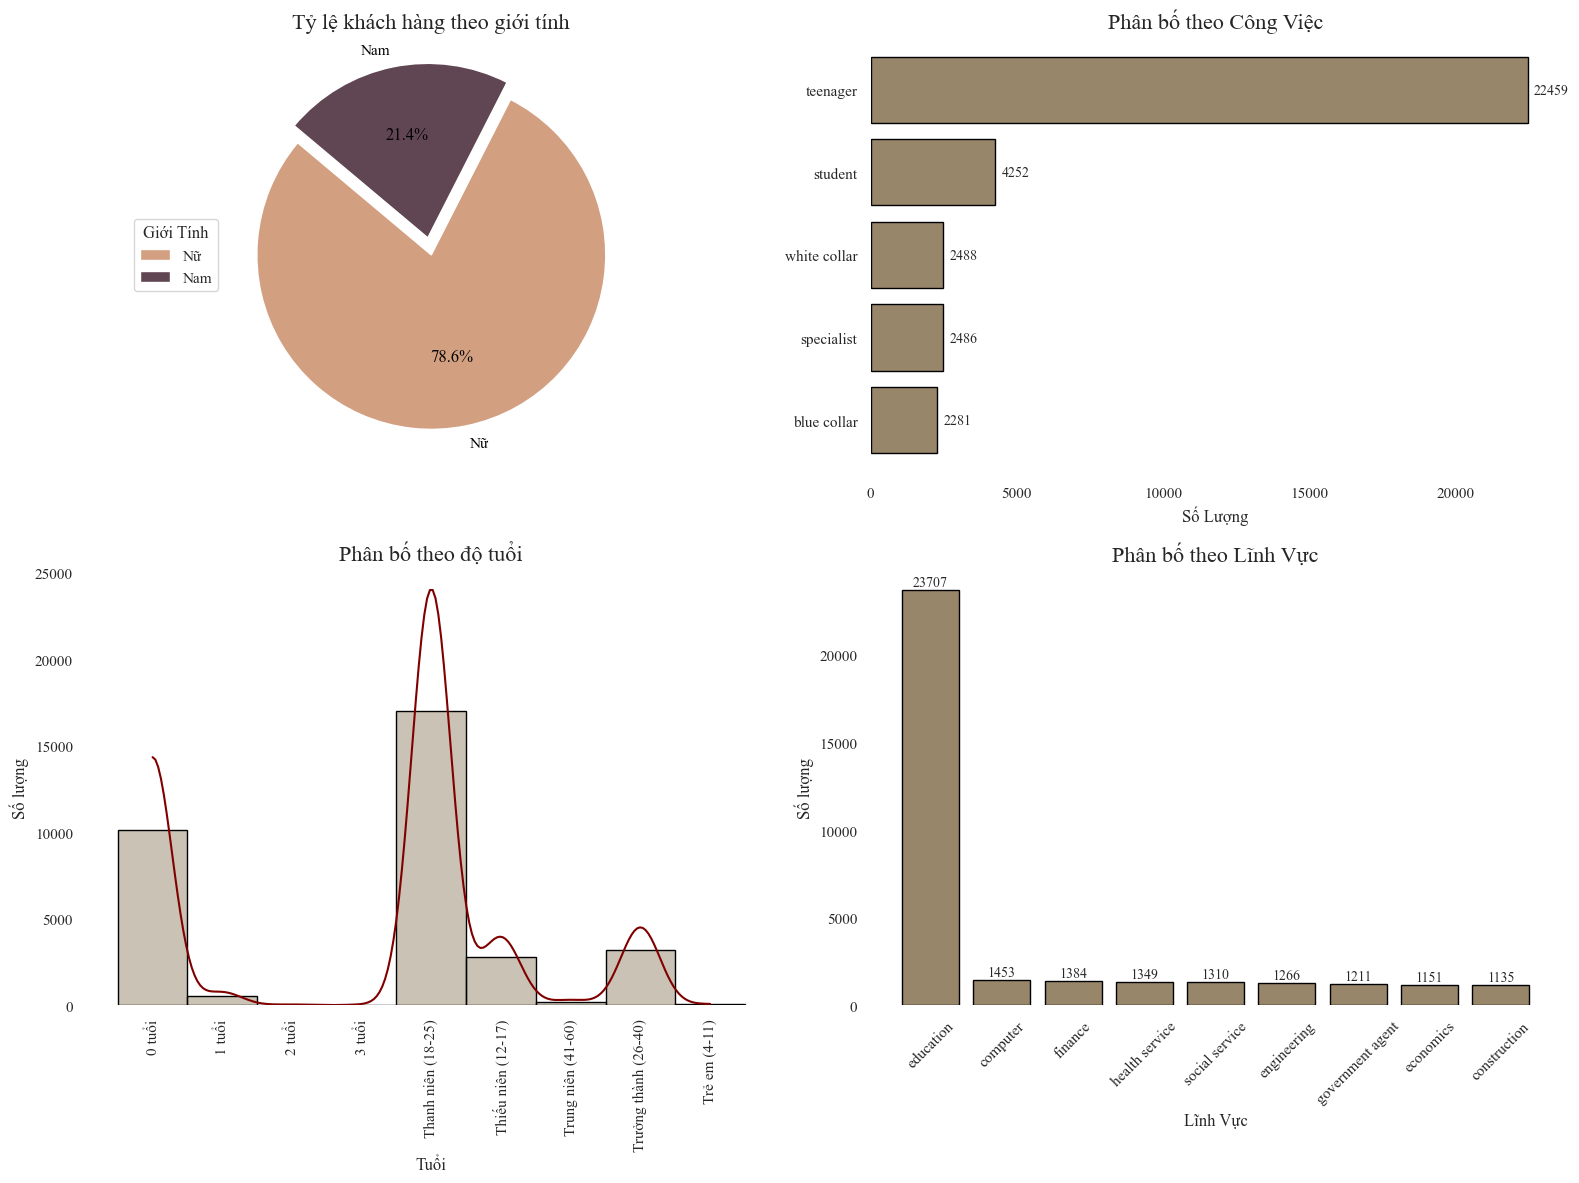

In [12]:

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'

fig, axs = plt.subplots(2, 2, figsize=(16, 12)) 
axs = axs.flatten() 
# Flatten để dễ truy cập
axs = axs.flatten()

# Chart 1: Pie giới tính
counts = cinema['Gender'].value_counts()
labels = counts.index
colors = ['#604652' if label == 'Nam' else '#D29F80' for label in labels]
explode = [0.1 if label == 'Nam' else 0 for label in labels]
wedges, texts, autotexts = axs[0].pie(
    counts, labels=labels, colors=colors, autopct='%1.1f%%',
    startangle=140, explode=explode, textprops={'color': 'black'}
)
axs[0].set_title('Tỷ lệ khách hàng theo giới tính', fontsize=16)
axs[0].legend(wedges, labels, title="Giới Tính", loc="center left", bbox_to_anchor=(-0.2, 0.5))

# Chart 2: Barh công việc

cinema_jobs = cinema['job'].value_counts()

axs[1].barh(cinema_jobs.index, cinema_jobs.values, color='#97866A', edgecolor='black')
axs[1].set_title('Phân bố theo Công Việc', fontsize=16)
axs[1].set_xlabel('Số Lượng', fontsize=12)
axs[1].invert_yaxis()
axs[1].grid(False)
for i, v in enumerate(cinema_jobs.values):
    axs[1].text(v + max(cinema_jobs.values)*0.01, i, str(v), va='center', fontsize=10)
for spine in axs[1].spines.values():
    spine.set_visible(False)

# Chart 3: Histogram độ tuổi
cinema_sorted = cinema.sort_values(by='Age Group')
sns.histplot(
    data=cinema_sorted,
    x='Age Group',
    kde=True,
    bins=60,
    color='#97866A',
    edgecolor='black',
    ax=axs[2], 
)

axs[2].lines[0].set_color('maroon')

axs[2].set_title('Phân bố theo độ tuổi', fontsize=16)
axs[2].set_xlabel('Tuổi', fontsize=12)
axs[2].set_ylabel('Số lượng', fontsize=12)
axs[2].tick_params(axis='x', rotation=90)
axs[2].grid(False)
for spine in axs[2].spines.values():
    spine.set_visible(False)


# Chart 4: Bar lĩnh vực
cinema_industry = cinema['industry'].value_counts()
axs[3].bar(cinema_industry.index, cinema_industry.values, color='#97866A', edgecolor='black')
axs[3].set_xlabel('Lĩnh Vực', fontsize=12)
axs[3].set_ylabel('Số lượng', fontsize=12)
axs[3].set_title('Phân bố theo Lĩnh Vực', fontsize=16)
axs[3].grid(axis='y', linestyle='--', alpha=0.7)
axs[3].tick_params(axis='x', rotation=45)
for i, v in enumerate(cinema_industry.values):
    axs[3].text(i, v + max(cinema_industry.values)*0.01, str(v), ha='center', fontsize=10)
for spine in axs[3].spines.values():
    spine.set_visible(False)
    
plt.grid(False)
plt.tight_layout()
plt.show()


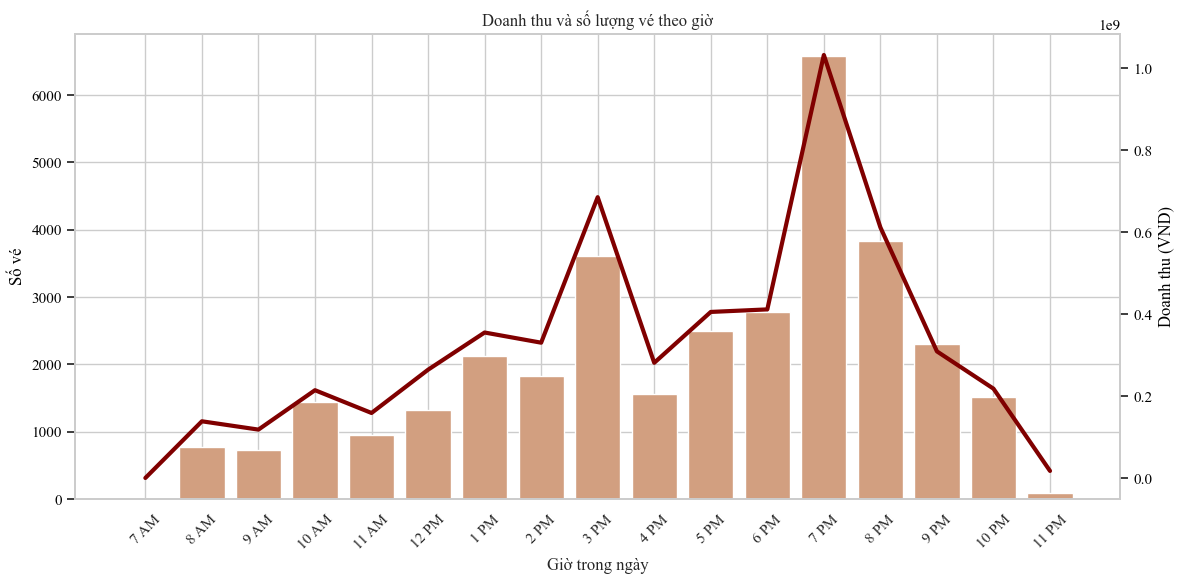

In [13]:

# Chuyển đổi cột 'time' sang kiểu datetime và trích xuất giờ
cinema['hour'] = pd.to_datetime(cinema['time'], errors='coerce').dt.hour

# Tính doanh thu và số lượng vé theo giờ
revenue_by_hour = cinema.groupby('hour')['total'].sum()
ticket_count_by_hour = cinema.groupby('hour').size()


hourly_summary = pd.DataFrame({
    'Doanh thu': revenue_by_hour,
    'Số vé': ticket_count_by_hour
})


fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.bar(hourly_summary.index, hourly_summary['Số vé'], color='#D29F80', label='Số vé')
ax1.set_xlabel('Giờ trong ngày')
ax1.set_ylabel('Số vé', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(7, 24))
ax1.set_xticklabels(
    [f"{h} AM" if h < 12 else ("12 PM" if h == 12 else f"{h-12} PM") for h in range(7, 24)],
    rotation=45
)


ax2 = ax1.twinx()
ax2.plot(hourly_summary.index, hourly_summary['Doanh thu'], color='maroon', linewidth=3, label='Doanh thu')
ax2.set_ylabel('Doanh thu (VND)', color='black')
ax2.tick_params(axis='y', labelcolor='black')


plt.grid(False)
plt.title("Doanh thu và số lượng vé theo giờ")
fig.tight_layout()
plt.show()


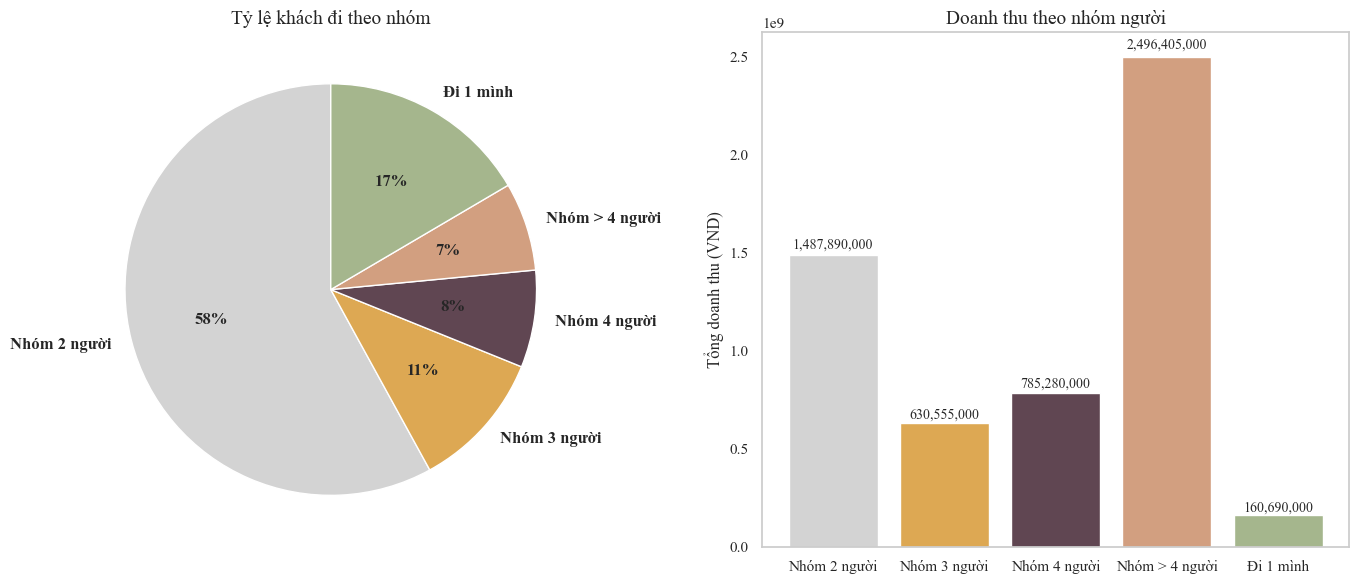

In [15]:

# Tính số người trong mỗi đơn hàng
order_size = cinema.groupby('orderid')['customerid'].count()

# Phân loại nhóm người
def classify_group(n):
    if n == 1:
        return "Đi 1 mình"
    elif n == 2:
        return "Nhóm 2 người"
    elif n == 3:
        return "Nhóm 3 người"
    elif n == 4:
        return "Nhóm 4 người"
    else:
        return "Nhóm > 4 người"

group_df = order_size.reset_index(name='group_size')
group_df['group_label'] = group_df['group_size'].apply(classify_group)

# Tỷ lệ theo nhóm người
group_ratio = group_df['group_label'].value_counts(normalize=True).sort_index() * 100

# Doanh thu theo nhóm người
order_total = cinema.groupby('orderid')['total'].sum().reset_index()
group_df = group_df.merge(order_total, on='orderid')
revenue_by_group = group_df.groupby('group_label')['total'].sum().sort_index()

# Màu dùng chung cho cả 2 biểu đồ
colors = ['lightgrey', '#DDA853', '#604652', '#D29F80', '#A5B68D']

# Tạo subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart: tỷ lệ nhóm người
ax1.pie(group_ratio, labels=group_ratio.index, autopct='%1.0f%%', colors=colors,
        startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
ax1.set_title("Tỷ lệ khách đi theo nhóm", fontsize=14)

# Bar chart: doanh thu theo nhóm
bars = ax2.bar(revenue_by_group.index, revenue_by_group.values, color=colors)
ax2.set_title("Doanh thu theo nhóm người", fontsize=14)
ax2.set_ylabel("Tổng doanh thu (VND)")
ax2.set_xlabel("")
ax2.tick_params(axis='x', rotation=0)
ax2.grid(False)

# Gắn số doanh thu trên cột
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height + height*0.01, f"{height:,.0f}", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [17]:
cinema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33966 entries, 0 to 33965
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   orderid       33966 non-null  object
 1   cashier       33966 non-null  object
 2   saledate      33966 non-null  object
 3   total         33966 non-null  int64 
 4   customerid    33966 non-null  object
 5   ticketcode    33966 non-null  int64 
 6   date          33966 non-null  object
 7   time          33966 non-null  object
 8   slot          33966 non-null  object
 9   room          33966 non-null  int64 
 10  show_id       33966 non-null  object
 11  slot type     33966 non-null  object
 12  ticket type   33966 non-null  object
 13  ticket price  33966 non-null  int64 
 14  popcorn       33966 non-null  object
 15  DOB           33966 non-null  object
 16  Gender        33966 non-null  object
 17  Quận/Huyện    33966 non-null  object
 18  Tỉnh          33966 non-null  object
 19  job 

# Phân tích vé và doanh thu
Line chart doanh thu theo ngày	Xem trend bán vé
Bar chart giá vé theo loại vé hoặc loại chỗ	Giá trung bình cho từng loại
Scatter plot giữa tuổi khách và giá vé	Người trẻ hay lớn tuổi mua vé đắt hơn?

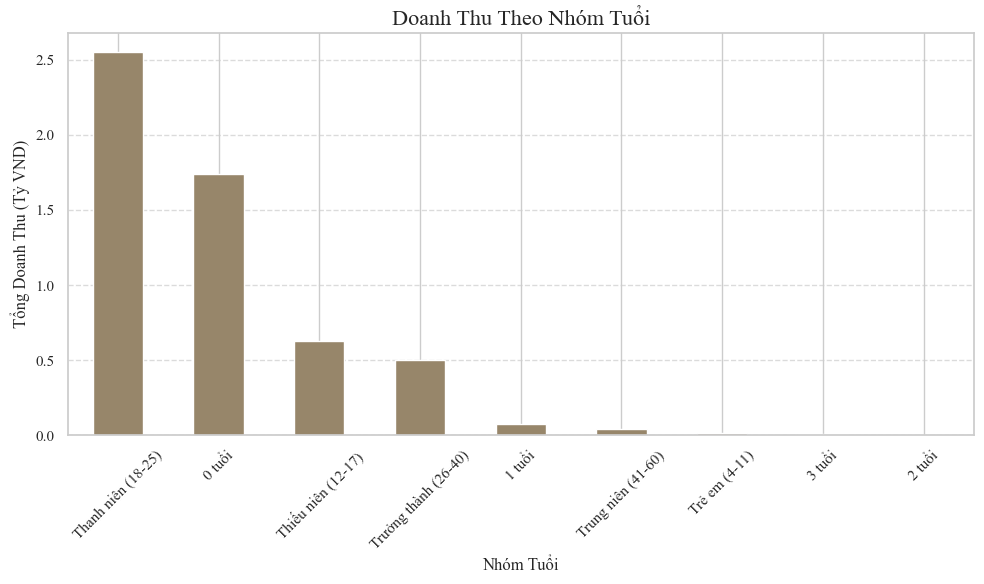

In [18]:
# Tính tổng doanh thu theo nhóm tuổi
revenue_by_age_group = cinema.groupby("Age Group")["total"].sum().sort_values(ascending=False) / 1e9

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
revenue_by_age_group.plot(kind='bar', color='#97866A')
plt.title("Doanh Thu Theo Nhóm Tuổi", fontsize=16)
plt.xlabel("Nhóm Tuổi", fontsize=12)
plt.ylabel("Tổng Doanh Thu (Tỷ VND)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

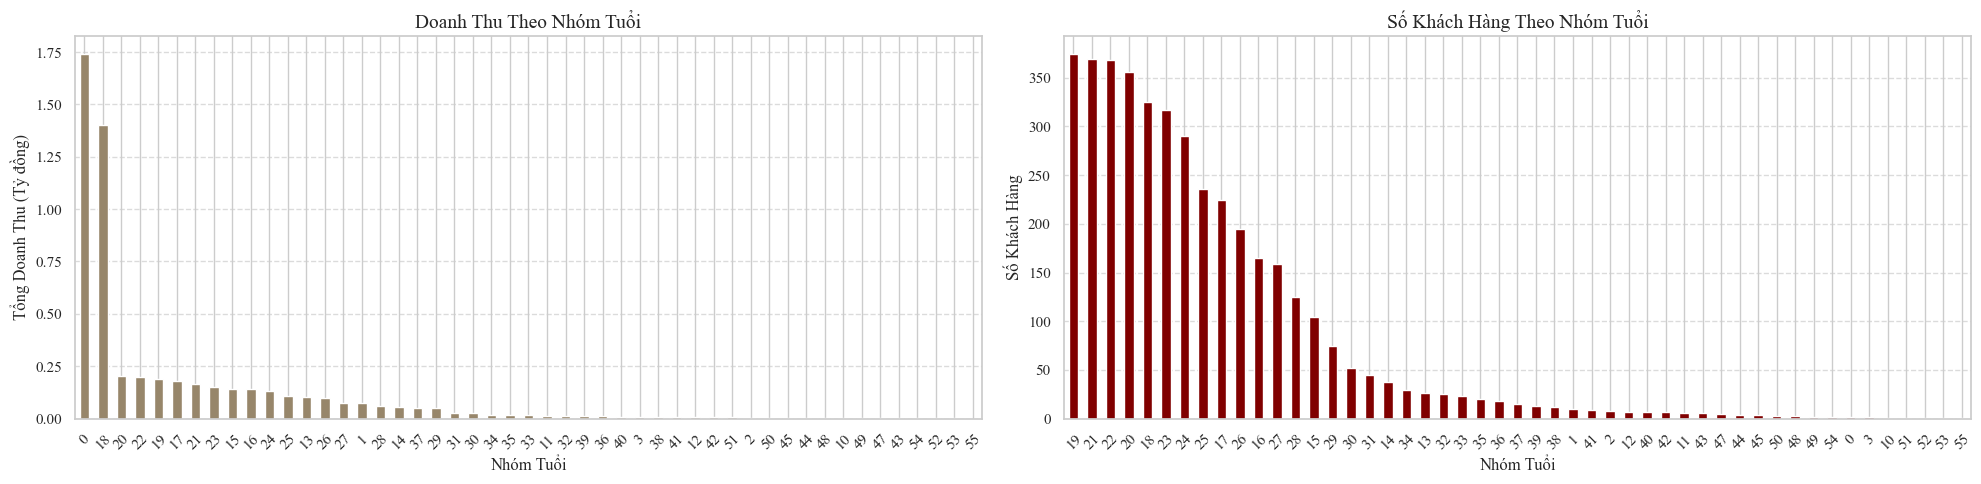

In [ ]:


# Tính doanh thu (Tỷ đồng) theo nhóm tuổi
revenue_by_age_group = cinema.groupby("Age")["total"].sum() / 1e9

# Tính số khách hàng duy nhất theo nhóm tuổi
unique_customers = cinema.groupby("Age")["customerid"].nunique()


# Tạo subplot: 1 hàng, 2 cột
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Biểu đồ 1: Doanh thu
revenue_by_age_group.sort_values(ascending=False).plot(kind='bar', color='#97866A', ax=axs[0])
axs[0].set_title("Doanh Thu Theo Tuổi", fontsize=14)
axs[0].set_xlabel("Nhóm Tuổi")
axs[0].set_ylabel("Tổng Doanh Thu (Tỷ đồng)")
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Biểu đồ 2:
unique_customers.sort_values(ascending=False).plot(kind='bar', color='maroon', ax=axs[1])
axs[1].set_title("Số Khách Hàng Theo Tuổi", fontsize=14)
axs[1].set_xlabel("Nhóm Tuổi")
axs[1].set_ylabel("Số Khách Hàng")
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


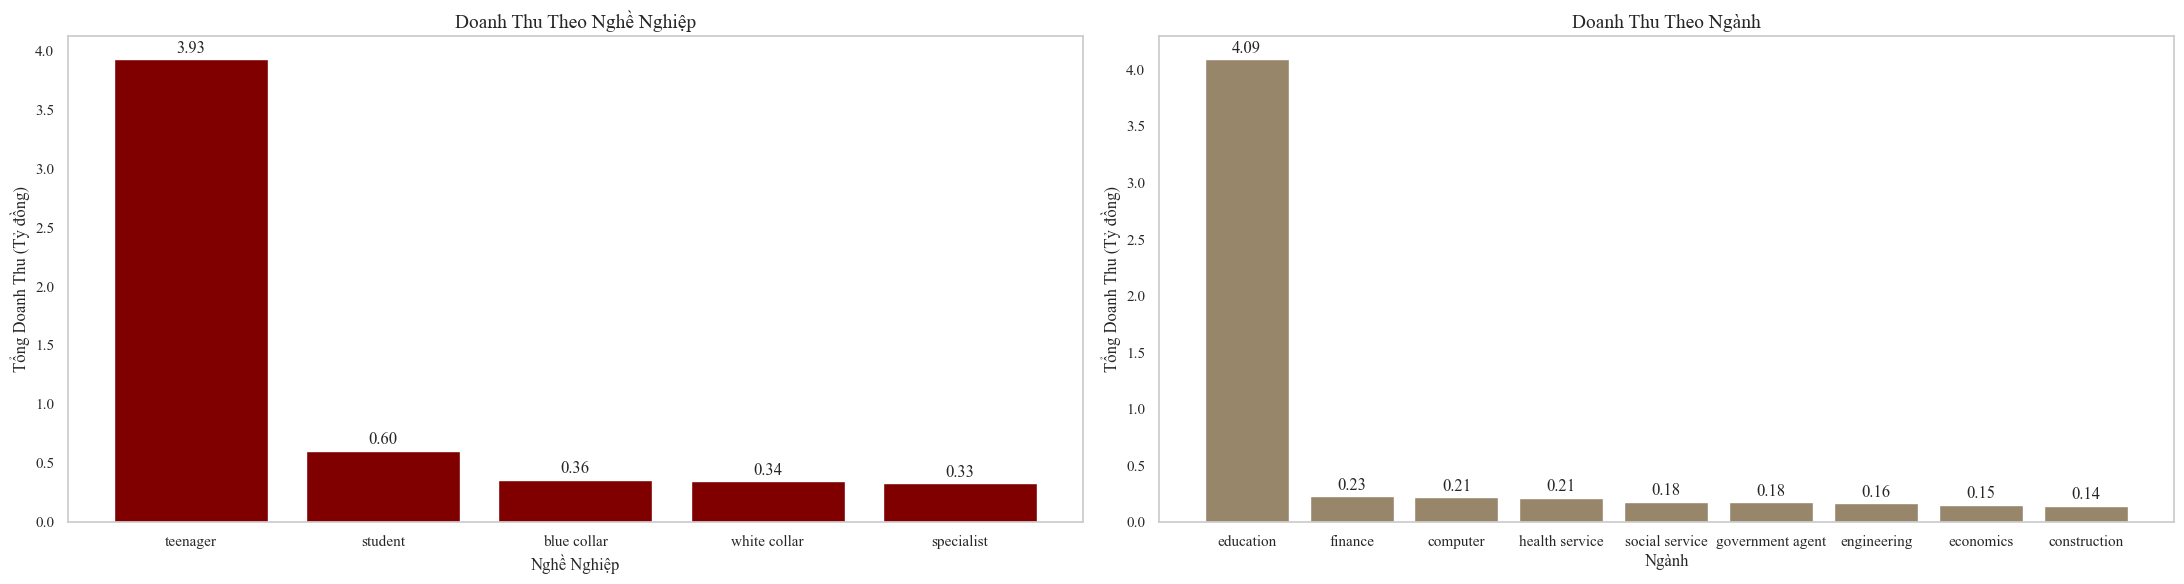

In [24]:

# Tính doanh thu theo nghề nghiệp (Tỷ đồng)
revenue_by_job = cinema.groupby("job")["total"].sum().sort_values(ascending=False) / 1e9

# Tính doanh thu theo ngành (Triệu đồng)
revenue_by_industry = cinema.groupby("industry")["total"].sum().sort_values(ascending=False) / 1e9

# Tạo subplot
fig, axs = plt.subplots(1, 2, figsize=(22, 6))

# --- Biểu đồ 1: Revenue theo Job ---
bars1 = axs[0].bar(revenue_by_job.index, revenue_by_job.values, color='maroon')
axs[0].set_title("Doanh Thu Theo Nghề Nghiệp", fontsize=14)
axs[0].set_xlabel("Nghề Nghiệp")
axs[0].set_ylabel("Tổng Doanh Thu (Tỷ đồng)")

axs[0].grid(False)

# Gắn số liệu lên cột
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", 
                ha='center', va='bottom', fontsize=12)

# --- Biểu đồ 2: Revenue theo Industry ---
bars2 = axs[1].bar(revenue_by_industry.index, revenue_by_industry.values, color='#97866A')
axs[1].set_title("Doanh Thu Theo Ngành", fontsize=14)
axs[1].set_xlabel("Ngành")
axs[1].set_ylabel("Tổng Doanh Thu (Tỷ đồng)")
axs[1].grid(False)

# Gắn số liệu lên cột
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.2f}", 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Phân tích phim
Bar chart thể loại phim	Thể loại nào được xem nhiều nhất
Bar chart phân loại phim	Phân loại nào phổ biến (PG, R,...)
Boxplot thời lượng theo thể loại	Các thể loại có thời lượng chênh lệch ra sao

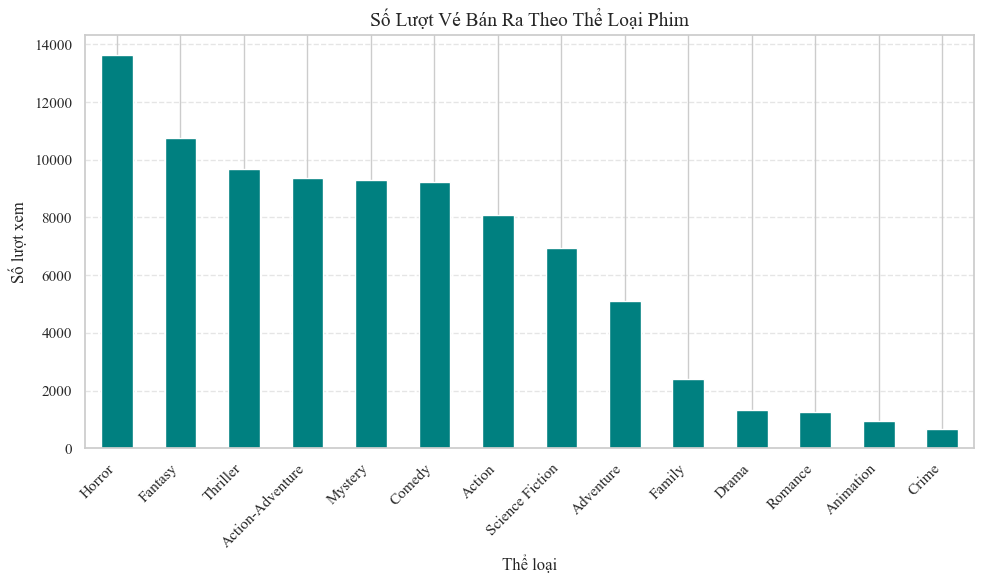

In [39]:



# Tách thể loại thành từng dòng
all_genres = cinema['listed_in'].str.split(',').explode().str.strip()

# Đếm số lượt xem mỗi thể loại
genre_counts = all_genres.value_counts().sort_values(ascending=False)

# Lấy Top 10 thể loại phổ biến nhất
top_genres = genre_counts

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='teal')
plt.title("Số Lượt Vé Bán Ra Theo Thể Loại Phim", fontsize=14)
plt.xlabel("Thể loại")
plt.ylabel("Số lượt xem")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


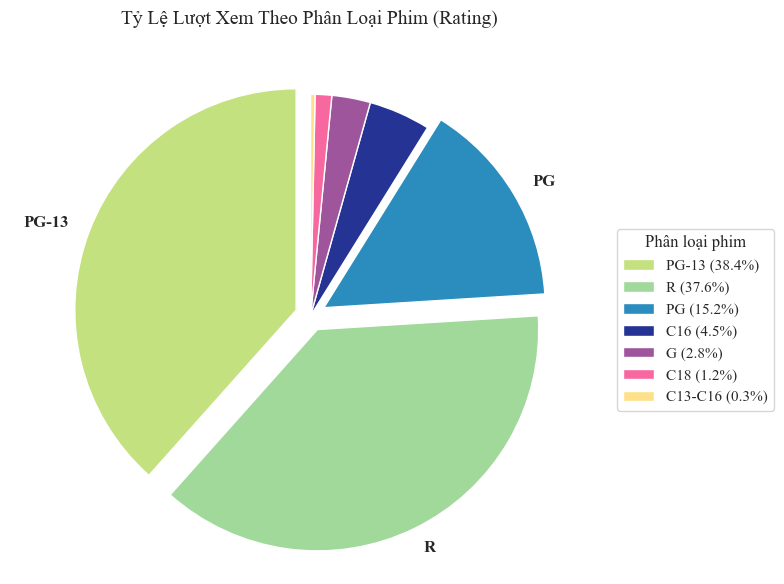

In [27]:


# Tính phần trăm lượt xem theo rating
rating_percent = cinema['rating'].value_counts(normalize=True).sort_values(ascending=False) * 100

# Lấy top 3 thể loại lớn nhất
top3 = rating_percent.head(3).index.tolist()

# Gắn label cho top 3, còn lại để trống
labels = [label if label in top3 else '' for label in rating_percent.index]

# Danh sách label cho legend: "PG-13 (38.4%)"
legend_labels = [f"{label} ({pct:.1f}%)" for label, pct in zip(rating_percent.index, rating_percent.values)]

# Màu sắc tùy chọn
colors = ['#c4e17f', '#a1d99b', '#2b8cbe', '#253494', '#9e559c', '#f768a1', '#fee08b']

# Tách (explode) 3 phần lớn nhất ra
explode = [0.07 if label in top3 else 0 for label in rating_percent.index]

# Vẽ pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    rating_percent,
    labels=labels,
    explode=explode,
    colors=colors[:len(rating_percent)],
    startangle=90,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Legend bên phải
plt.legend(legend_labels, title="Phân loại phim", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=11)

# Tiêu đề và căn chỉnh
plt.title("Tỷ Lệ Lượt Xem Theo Phân Loại Phim (Rating)", fontsize=14, pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [28]:
# jztr

# Phân tích bắp ngô
Pie chart có mua bắp/ngô không	Phần trăm khách hàng mua combo
Bar chart tỷ lệ mua bắp theo giới tính hoặc tuổi	Nhóm nào thích ăn bắp nhất

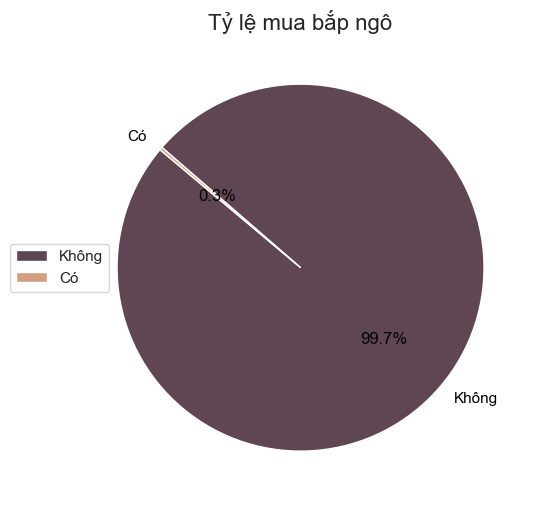

In [29]:
sns.set_theme(style="whitegrid")

counts = cinema['popcorn'].value_counts()
labels = counts.index

colors = ['#604652' if label == 'Không' else '#D29F80' for label in labels]
# explode = [0.1 if label == 'Có' else 0 for label in labels]

# Vẽ biểu đồ
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    counts, labels=labels, colors=colors, autopct='%1.1f%%', 
    startangle=140, textprops={'color': 'black'}
)

# Thêm bảng chú giải (legend)
plt.legend(wedges, labels, title="Bắp Ngô", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Tiêu đề
plt.title('Tỷ lệ mua bắp ngô', fontsize=16)
plt.tight_layout()
plt.legend(bbox_to_anchor=(-0.15,0.5), loc='center left')

plt.rcParams['font.family'] = 'Times New Roman'

plt.show()